In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [ ]:
#reading the csv in drive
temporal_features=pd.read_csv('/content/drive/MyDrive/W1/temporal_features.csv')
concatenated_df_temporal=pd.read_csv('/content/drive/MyDrive/W1/concatenated_df_temporal.csv')

In [ ]:
#selecting temporal features based on PCC
num1,num2,num3 = list(),list(),list()
from scipy.stats import pearsonr

for i in concatenated_df_temporal.columns:
    X=concatenated_df_temporal['{}'.format(i)].astype(float)
    y=concatenated_df_temporal['Wear'].astype(float)

    correlation,pvalue=pearsonr(X,y)

    num3.append(pvalue)
    num1.append(i)
    num2.append(correlation)

correlation_tables = pd.DataFrame({'Feature':num1,'Correlation':num2,'P-value':num3}).sort_values('Correlation',ascending=False)
correlation_tables

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,Feature,Correlation,P-value
144,Wear,1.000000,0.000000e+00
37,2_Area under the curve,0.388162,3.797817e-108
36,2_Absolute energy,0.333876,8.464842e-79
52,2_Total energy,0.333876,8.464842e-79
38,2_Autocorrelation,0.333876,8.464842e-79
...,...,...,...
115,6_Median absolute diff,NaN,NaN
116,6_Median diff,NaN,NaN
125,6_Zero crossing rate,NaN,NaN
133,7_Median absolute diff,NaN,NaN


In [ ]:
#selecting the temporal features having correlation more tha 0.3
to_model=correlation_tables.iloc[1:11,0:2]
to_model

,Feature,Correlation
37,2_Area under the curve,0.388162
36,2_Absolute energy,0.333876
52,2_Total energy,0.333876
38,2_Autocorrelation,0.333876
56,3_Autocorrelation,0.320608
54,3_Absolute energy,0.320608
70,3_Total energy,0.320608
130,7_Entropy,0.317964
65,3_Peak to peak distance,0.313867
112,6_Entropy,0.301462


In [ ]:
#getting the values for selected temporal features with highest correlation
to_model = concatenated_df_temporal[['2_Area under the curve', '2_Absolute energy', '2_Total energy', '2_Autocorrelation', '3_Autocorrelation', '3_Absolute energy', '3_Total energy', '7_Entropy', '3_Peak to peak distance', '6_Entropy']].copy()
to_model

,2_Area under the curve,2_Absolute energy,2_Total energy,2_Autocorrelation,3_Autocorrelation,3_Absolute energy,3_Total energy,7_Entropy,3_Peak to peak distance,6_Entropy
0,24.073760,275039.366749,275959.230852,275039.366749,242567.801469,242567.801469,243379.065019,0.198421,131.649,0.198236
1,19.883898,218722.539846,219454.053357,218722.539846,200575.815845,200575.815845,201246.637971,0.284333,125.027,0.284333
2,12.272329,99843.301589,100177.225675,99843.301589,102361.493798,102361.493798,102703.839931,0.222873,64.968,0.222873
3,22.404152,266276.177930,267166.733709,266276.177930,261163.021664,261163.021664,262036.476586,0.269143,125.484,0.269143
4,11.267548,99827.593967,100161.465519,99827.593967,116201.757099,116201.757099,116590.391738,0.239560,118.519,0.239560
...,...,...,...,...,...,...,...,...,...,...
2986,17.313030,137967.288365,138428.717424,137967.288365,189543.565491,189543.565491,190177.490459,0.332647,93.970,0.332647
2987,19.306225,176704.317733,177295.302073,176704.317733,203083.045971,203083.045971,203762.253483,0.265256,109.956,0.265256
2988,20.494643,205091.831704,205777.757562,205091.831704,120711.212837,120711.212837,121114.929267,0.317506,112.354,0.317506
2989,18.508454,154448.961751,154965.513463,154448.961751,139415.660872,139415.660872,139881.933985,0.310879,92.828,0.308117


In [ ]:
#using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
min_max_scaled=scaler.fit_transform(to_model)
min_max_scaled=pd.DataFrame(min_max_scaled, columns=to_model.columns)

In [ ]:
#using standard scaler
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
std_scaled=scaler1.fit_transform(to_model)
std_scaled=pd.DataFrame(std_scaled, columns=to_model.columns)

In [ ]:
#splitting all temporal features data for training and testing
from sklearn.model_selection import train_test_split
X = temporal_features
y = concatenated_df_temporal['Wear']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#passing all temporal features to knn
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train.astype(float), y_train.astype(float))
y_pred_knn = knn.predict(X_test)

In [ ]:
#checking performance of knn model on all temporal features
mse_knn = mean_squared_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean squared error for KNN model:", mse_knn)
print("Mean absolute percentage error for KNN model:", mape_knn)
print("R2 score for KNN model:", r2_knn)

Mean squared error for KNN model: 0.001263791736227045
Mean absolute percentage error for KNN model: 0.19064575265295516
R2 score for KNN model: 0.11198878739546225


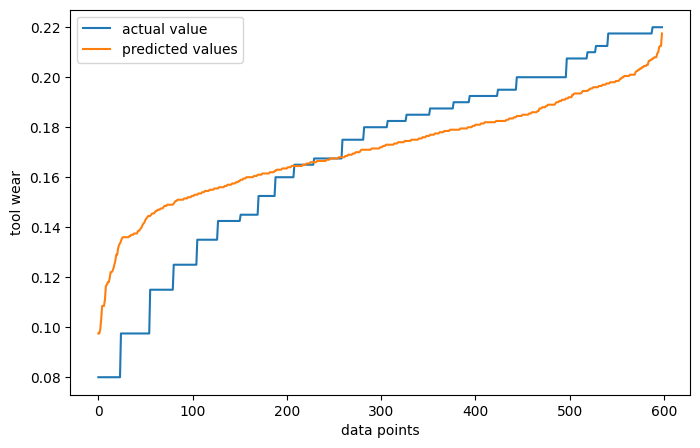

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_knn}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#passing all temporal features to decision tree
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

In [ ]:
#checking performance of decision tree model on all temporal features

mse_dt = mean_squared_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean squared error for DT model:", mse_dt)
print("Mean absolute percentage error for DT model:", mape_dt)
print("R2 score for DT model:", r2_dt)

Mean squared error for DT model: 0.0008979536591199554
Mean absolute percentage error for DT model: 0.156681267366414
R2 score for DT model: 0.3690472133657483


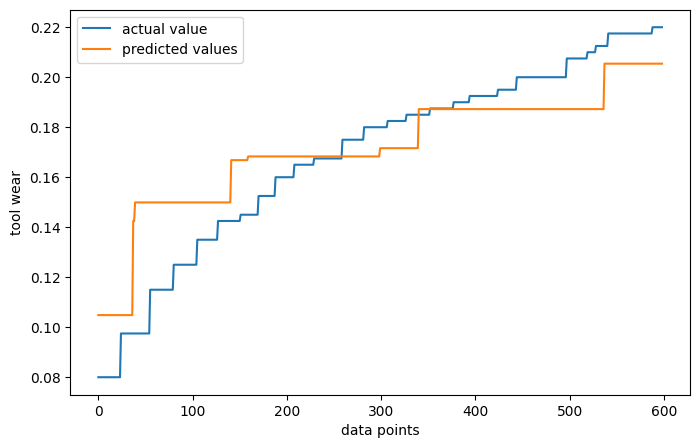

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_dt}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#splitting selected temporal features data for training and testing
X = to_model.astype(float)
y = concatenated_df_temporal['Wear'].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#passing selected temporal features to knn
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train.astype(float), y_train.astype(float))
y_pred_knn = knn.predict(X_test)

In [ ]:
#checking performance of knn model on selected temporal features
mse_knn = mean_squared_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean squared error for KNN model:", mse_knn)
print("Mean absolute percentage error for KNN model:", mape_knn)
print("R2 score for KNN model:", r2_knn)

Mean squared error for KNN model: 0.0011268105175292155
Mean absolute percentage error for KNN model: 0.17315915485307942
R2 score for KNN model: 0.20823950231393185


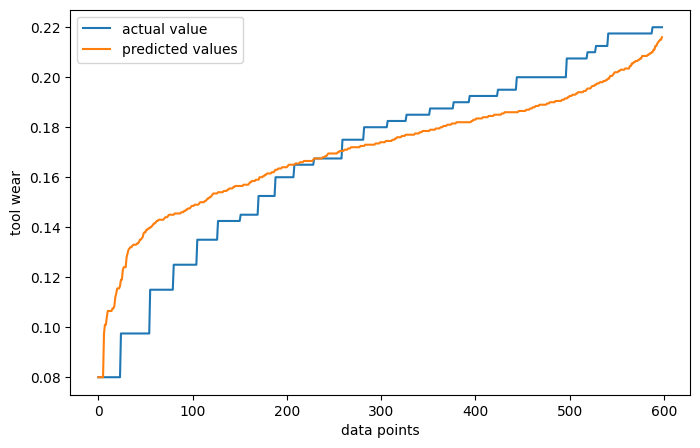

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_knn}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#passing selected temporal features to decision tree
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

In [ ]:
#checking performance of decision tree model on selected temporal features

mse_dt = mean_squared_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean squared error for DT model:", mse_dt)
print("Mean absolute percentage error for DT model:", mape_dt)
print("R2 score for DT model:", r2_dt)

Mean squared error for DT model: 0.000905257512880803
Mean absolute percentage error for DT model: 0.15912895862996185
R2 score for DT model: 0.36391511458005776


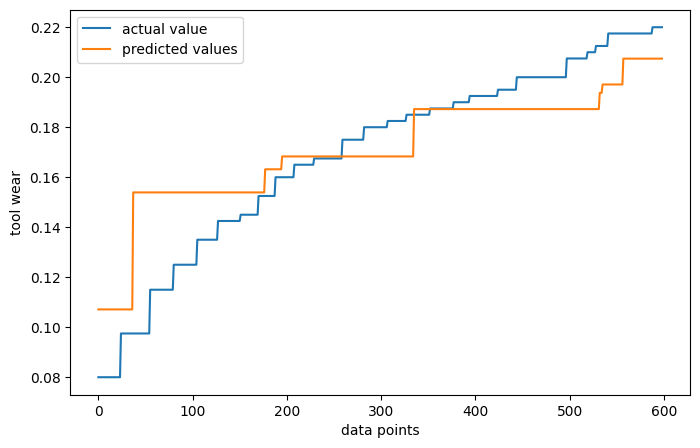

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_dt}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#passing selected temporal features to random forest
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, n_jobs=3)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [ ]:
#checking performance of random forest model on selected temporal features

mse_rf = mean_squared_error(y_test, y_pred_dt)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_dt)

print("Mean squared error for RF model:", mse_rf)
print("Mean absolute percentage error for RF model:", mape_rf)
print("R2 score for RF model:", r2_rf)

Mean squared error for RF model: 0.000905257512880803
Mean absolute percentage error for RF model: 0.15912895862996185
R2 score for RF model: 0.36391511458005776


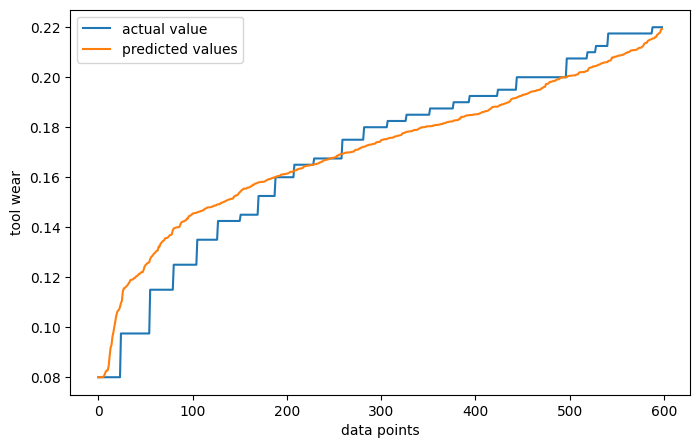

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#splitting scaled selected temporal features data for training and testing
from sklearn.model_selection import train_test_split
X = std_scaled.astype(float)
y = concatenated_df_temporal['Wear'].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#passing scaled selected temporal features to knn
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train.astype(float), y_train.astype(float))
y_pred_knn = knn.predict(X_test)

In [ ]:
#checking performance of knn model on scaled selected temporal features
mse_knn = mean_squared_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean squared error for KNN model:", mse_knn)
print("Mean absolute percentage error for KNN model:", mape_knn)
print("R2 score for KNN model:", r2_knn)

Mean squared error for KNN model: 0.0006820404841402337
Mean absolute percentage error for KNN model: 0.12254181512208959
R2 score for KNN model: 0.5207599638411105


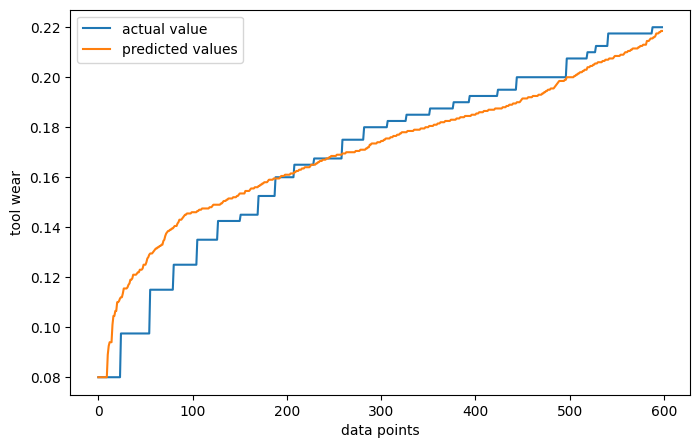

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_knn}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#passing scaled selected temporal features to decision tree
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

In [ ]:
#checking performance of decision tree model on scaled selected temporal features

mse_dt = mean_squared_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean squared error for DT model:", mse_dt)
print("Mean absolute percentage error for DT model:", mape_dt)
print("R2 score for DT model:", r2_dt)

Mean squared error for DT model: 0.0009052575128808021
Mean absolute percentage error for DT model: 0.15912895862996204
R2 score for DT model: 0.36391511458005843


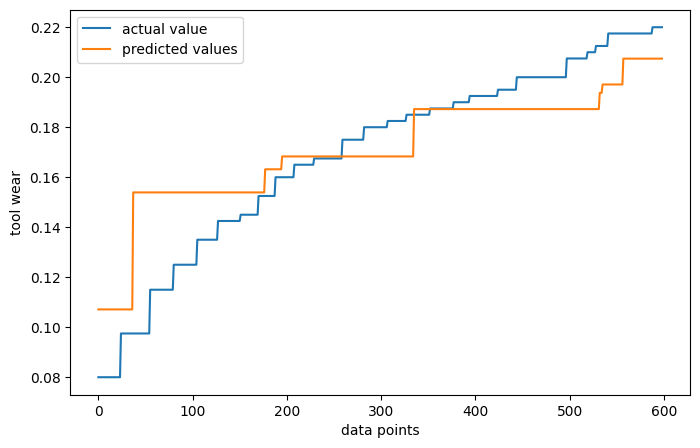

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_dt}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#passing scaled selected temporal features to random forest
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, n_jobs=3)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [ ]:
#checking performance of random forest model on scaled selected temporal features

mse_rf = mean_squared_error(y_test, y_pred_dt)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_dt)

print("Mean squared error for RF model:", mse_rf)
print("Mean absolute percentage error for RF model:", mape_rf)
print("R2 score for RF model:", r2_rf)

Mean squared error for RF model: 0.0009052575128808021
Mean absolute percentage error for RF model: 0.15912895862996204
R2 score for RF model: 0.36391511458005843


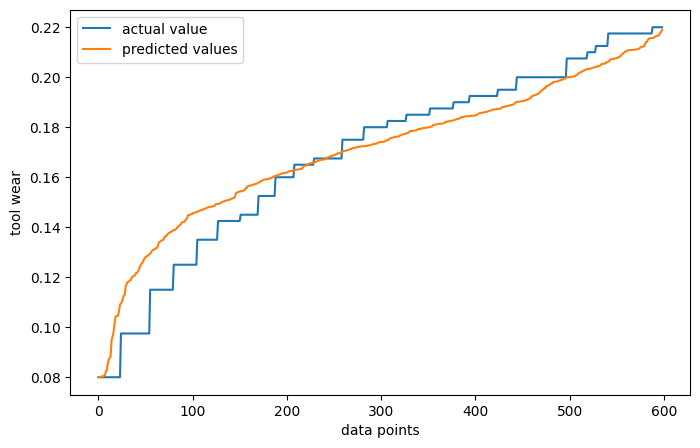

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()